In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
data_array = np.load('pulse.npy')
data = pd.DataFrame(data_array, columns = ['BVP'])

In [3]:
data_array_1 = np.load('hrs.npy')
hrs = pd.DataFrame(data_array_1, columns = ['hrs'])

In [4]:
data_array_1 = np.load('fft_spec.npy')
fft_spec = pd.DataFrame(data_array_1)

In [5]:
data_array_1 = np.load('time.npy')
time = pd.DataFrame(data_array_1, columns = ['time'])
time = time.iloc[(len(time)-len(data)):]
time.reset_index(inplace=True)
time = time.drop(['index'], axis=1)

# time['index'] = range(0, 300, 10)
# time = time.set_index(time['index'])
# time = time.drop('index', axis=1)

In [6]:
# data_array_1 = np.load('fps_capture.npy')
# fps_capture = pd.DataFrame(data_array_1, columns=['time', 'time_2'])

In [7]:
# fps_capture['diff'] = 30/(fps_capture['time_2'] - fps_capture['time'])

In [8]:
data = pd.concat([data, time], axis=1)
# data = data.interpolate()

In [9]:
data['seconds'] = data['time'] - data['time'][0]

In [10]:
hrs = pd.concat([hrs, time], axis=1)
hrs['seconds'] = hrs['time'] - hrs['time'][0]
hrs['scaled'] = hrs['hrs'] - hrs['hrs'].min()

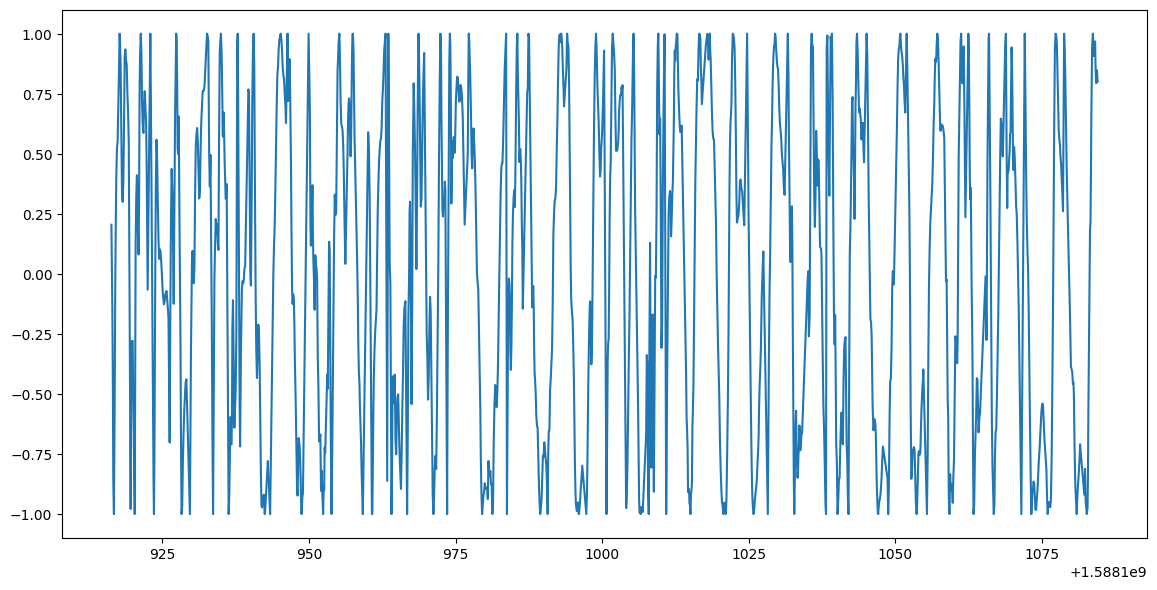

In [11]:
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(data['time'], data['BVP'])

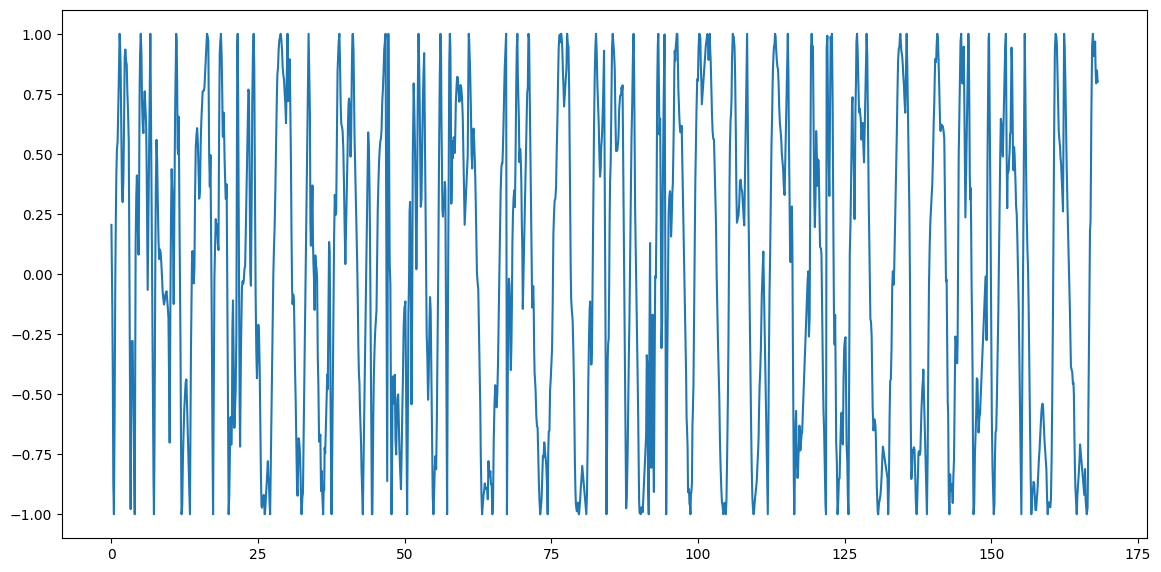

In [12]:
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(data['seconds'], data['BVP'])

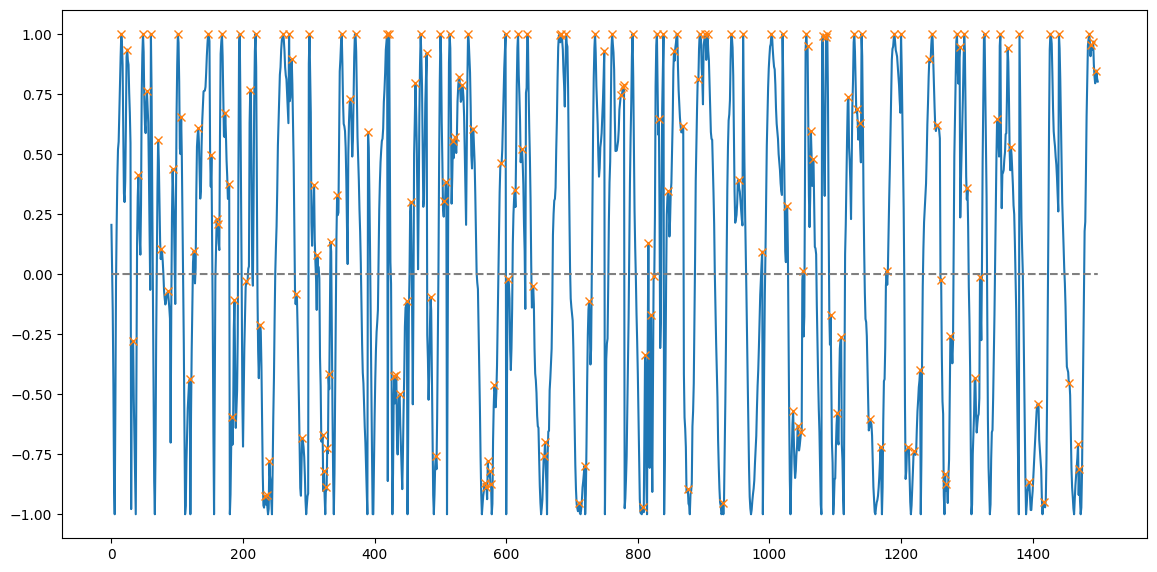

In [13]:
plt.figure(figsize=(14, 7), dpi=100)
x = data['BVP']
y = data['seconds']
peaks, _ = find_peaks(x, height=-1)
# , distance=12)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
sns.set(font_scale =1.5, style = 'ticks' )
plt.show()
# plt.xlim(0,3000)

In [14]:
y = pd.DataFrame(_, columns=['peak_heights'])

In [15]:
peaks = pd.DataFrame(peaks, columns=['peak_points'])
peaks = peaks.merge(y, on=peaks.index)
peaks = peaks.drop(['key_0'], axis=1)

In [16]:
peaked = peaks.set_index('peak_points')
data = pd.concat([data, peaked], axis=1)
data2 = data.dropna()
data2['diff'] = data2['seconds'].diff()
data2['norm_diff'] = (data2['diff'] - data2['diff'].min())/(data2['diff'].max() - data2['diff'].min())
# data2['diff_diff'] = data2['diff'].diff()
data3=data2[['diff', 'norm_diff']]
data3 = pd.DataFrame(data3)
data = pd.concat([data, data3], axis=1)

/home/steven/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/steven/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


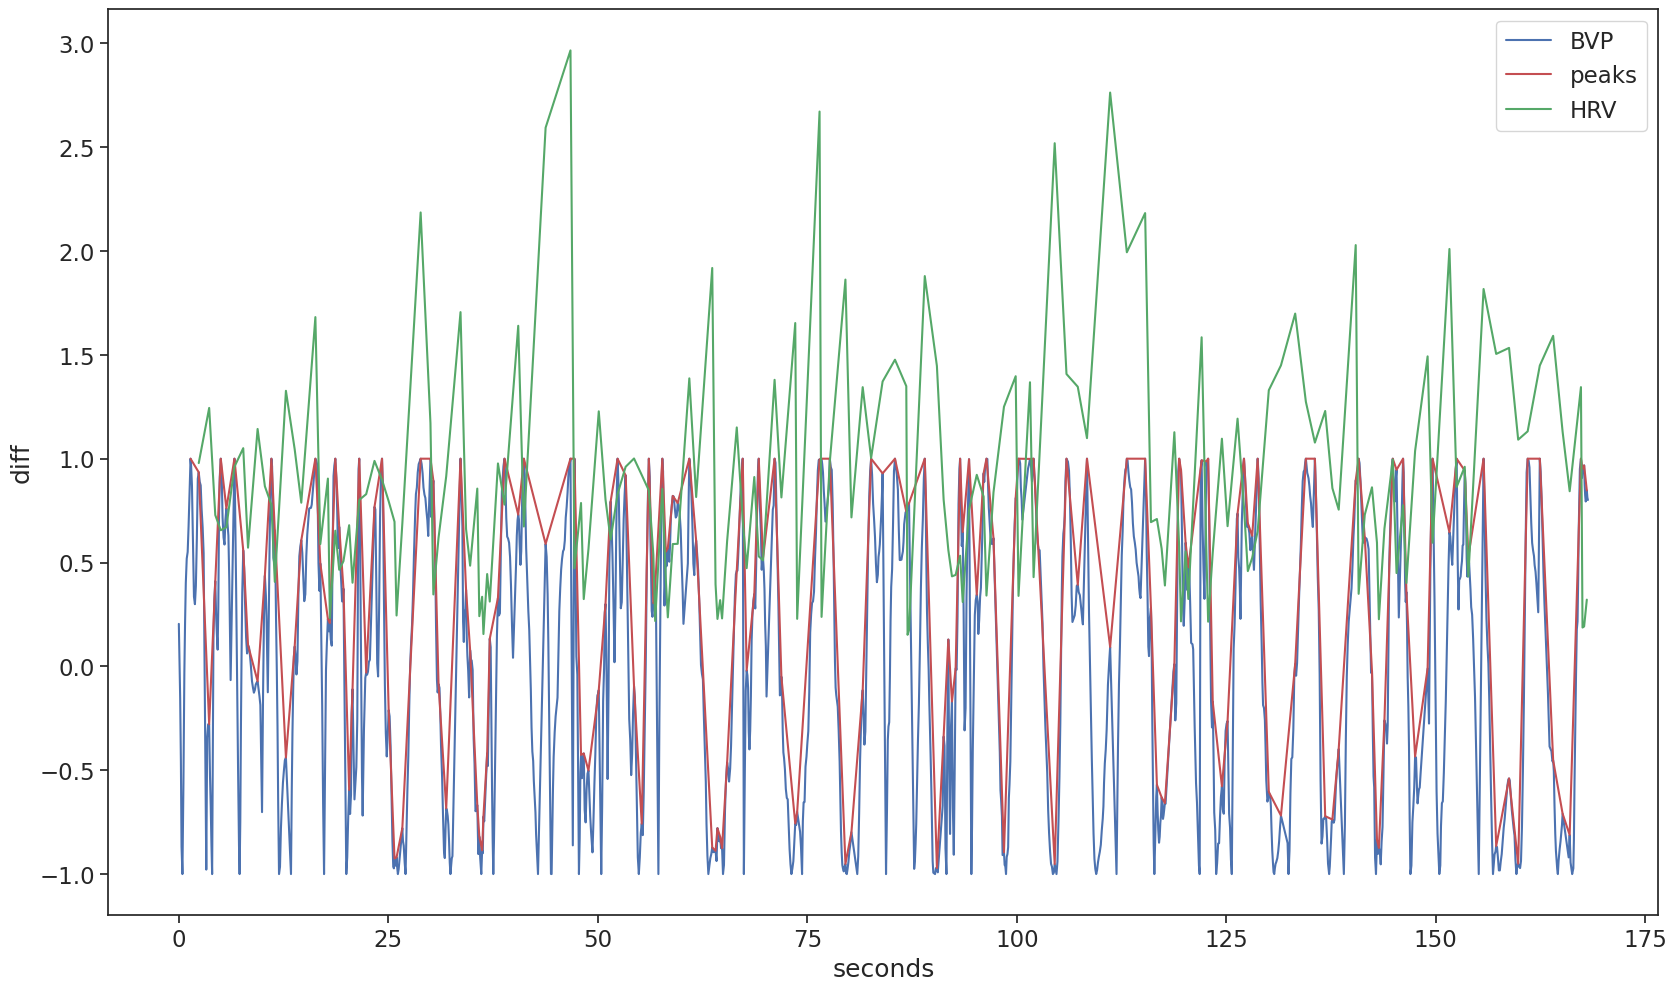

In [17]:
plt.figure(figsize=(20, 12), dpi=100)
sns.lineplot(data['seconds'], data['BVP'], label='BVP')
sns.lineplot(data['seconds'], data['peak_heights'], label='peaks', color='r')
sns.lineplot(data['seconds'], data['diff'], label='HRV', color='g')
# sns.lineplot(data['seconds'], data['norm_diff'], label='Normalized HRV', color='g')
# plt.plot(hrs['seconds'],hrs['scaled'])
plt.legend()
sns.set(font_scale =1.5, style = 'ticks' )

In [18]:
# plt.figure(figsize=(20, 12), dpi=100)
# sns.lineplot(data['seconds'], data['diff'], label='HRV', color='g')
# sns.lineplot(data['seconds'], data['diff_diff'], label='HRVV', color='y')

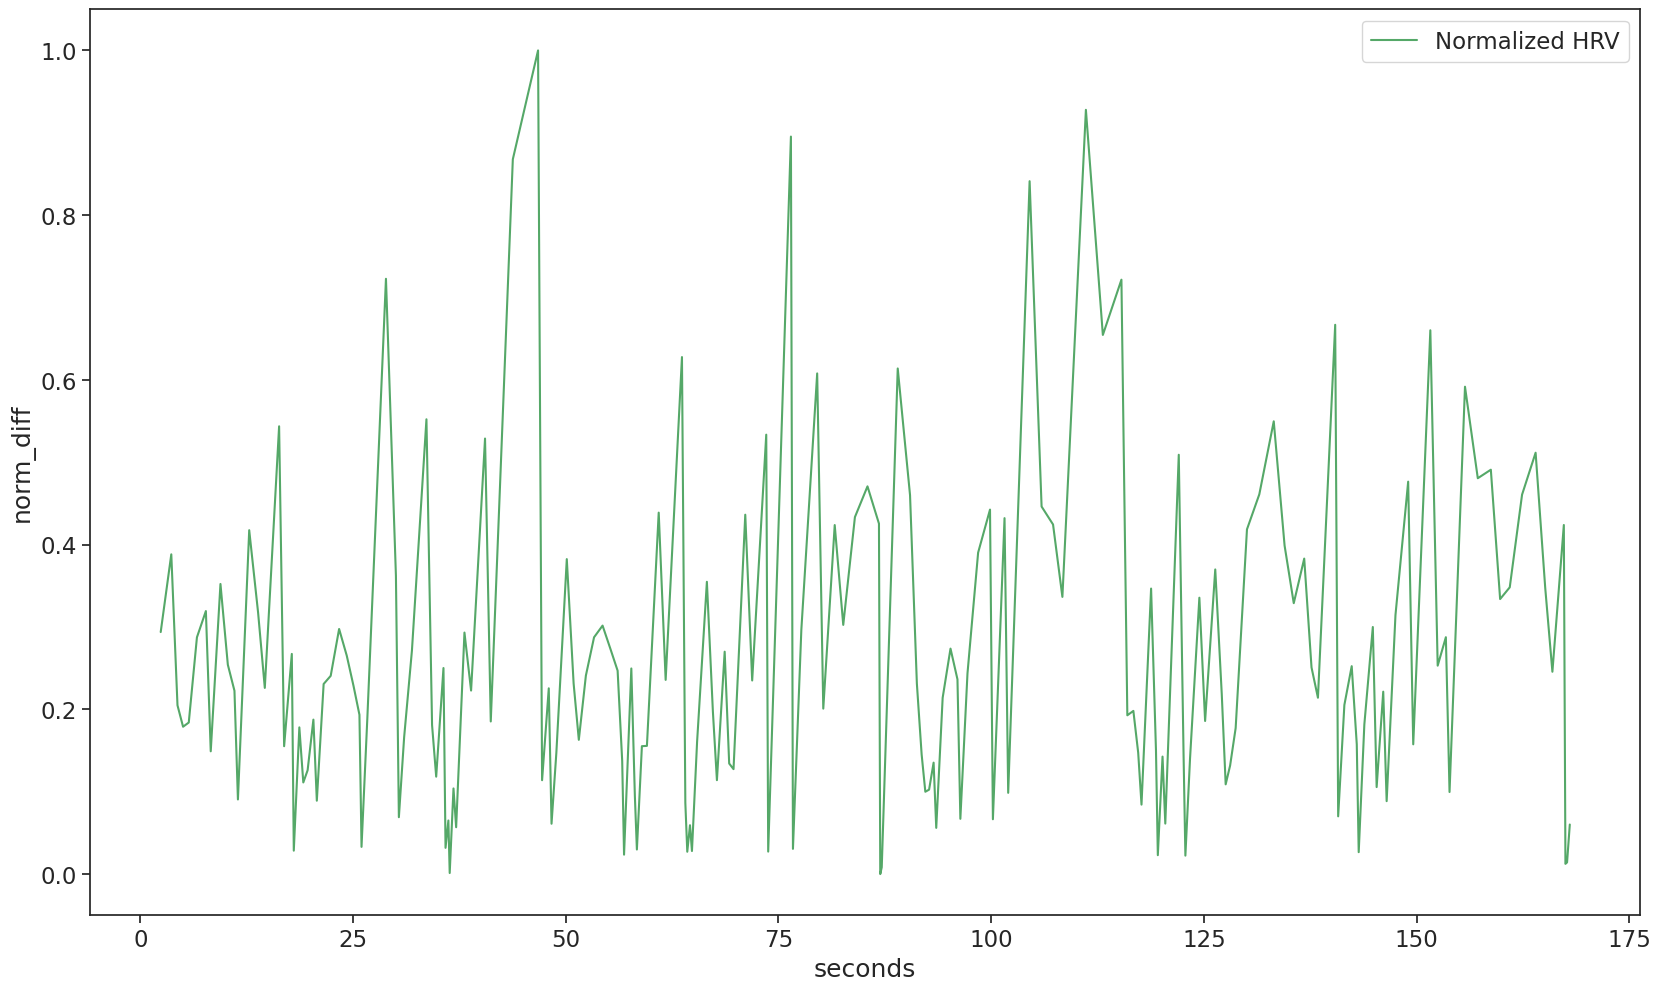

In [19]:
plt.figure(figsize=(20, 12), dpi=100)
sns.lineplot(data['seconds'], data['norm_diff'], label='Normalized HRV', color='g')
plt.legend()
sns.set(font_scale =1.5, style = 'ticks' )

In [20]:
data2 = data.dropna(subset=['diff'])
sample = data2['diff'][1:]
sample2 = data2['norm_diff'][1:]

In [21]:
import statistics 
print(f'HRV Variance', statistics.variance(sample))

HRV Variance 0.3067627904090325


In [22]:
import statistics 
print(f'Normalized HRV Variance', statistics.variance(sample2))

Normalized HRV Variance 0.038750478192310596


## RMSSE

The root mean square of successive differences between normal heartbeats (RMSSD) is obtained by first calculating each successive time difference between heartbeats in ms. Then, each of the values is squared and the result is averaged before the square root of the total is obtained. While the conventional minimum recording is 5 min, researchers have proposed ultra-short-term periods of 10 s, 30 s, and 60 s.

The RMSSD reflects the beat-to-beat variance in HR and is the primary time-domain measure used to estimate the vagally mediated changes reflected in HRV. The RMSSD is identical to the non-linear metric SD1, which reflects short-term HRV. Twenty-four-hour RMSSD measurements are strongly correlated with pNN50 and HF power. Minimum HR is more strongly correlated with LnSDANN than LnRMSSD (Ln means the natural logarithm). Maximum HR is weakly and inconsistently correlated with these time-domain measures.

While the RMSSD is correlated with HF power, the influence of respiration rate on this index is uncertain. The RMSSD is less affected by respiration than is RSA across several tasks. The RMSSD is more influenced by the PNS than SDNN. Lower RMSSD values are correlated with higher scores on a risk inventory of sudden unexplained death in epilepsy.

NN50, pNN50, and RMSSD are calculated using the differences between successive NN intervals. Since their computation depends on NN interval differences, they primarily index HF HR oscillations, are largely unaffected by trends in an extended time series, and are strongly correlated.

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5624990/

In [77]:
rmssd = (sum((data2['diff']*1000)**2))**.5
rmssd

In [79]:
nlrmssd = np.log(rmssd)
nlrmssd

8.822075977226685

### Table 1 – Data from 10,308 Elite HRV users showing ln(rMSSD) and Elite HRV Score presented by age range and gender.

Source: https://elitehrv.com/normal-heart-rate-variability-age-gender

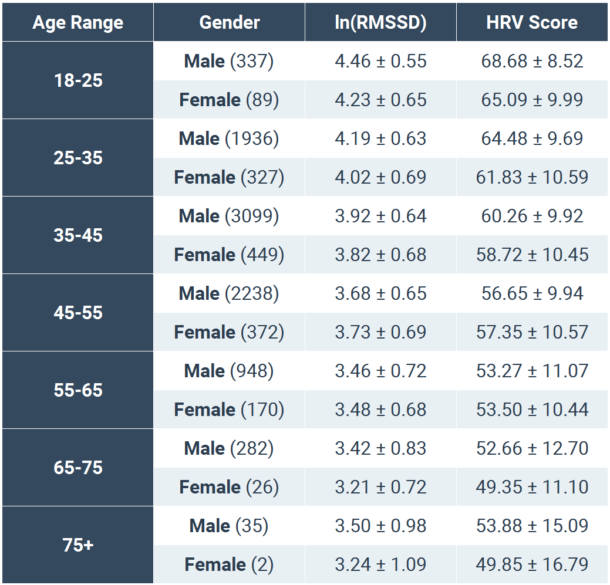

In [26]:
from IPython.display import Image
Image('/home/steven/Downloads/EliteHRV-AgeGender-610x585.png')

### Table 2 – Data gathered on Elite HRV platform shows rMSSD, ln(rMSSD), and “HRV Scores” for Elite HRV and is calculated for other HRV software applications based on published calculations. The data does  not necessarily represent the user populations for the other HRV platforms.

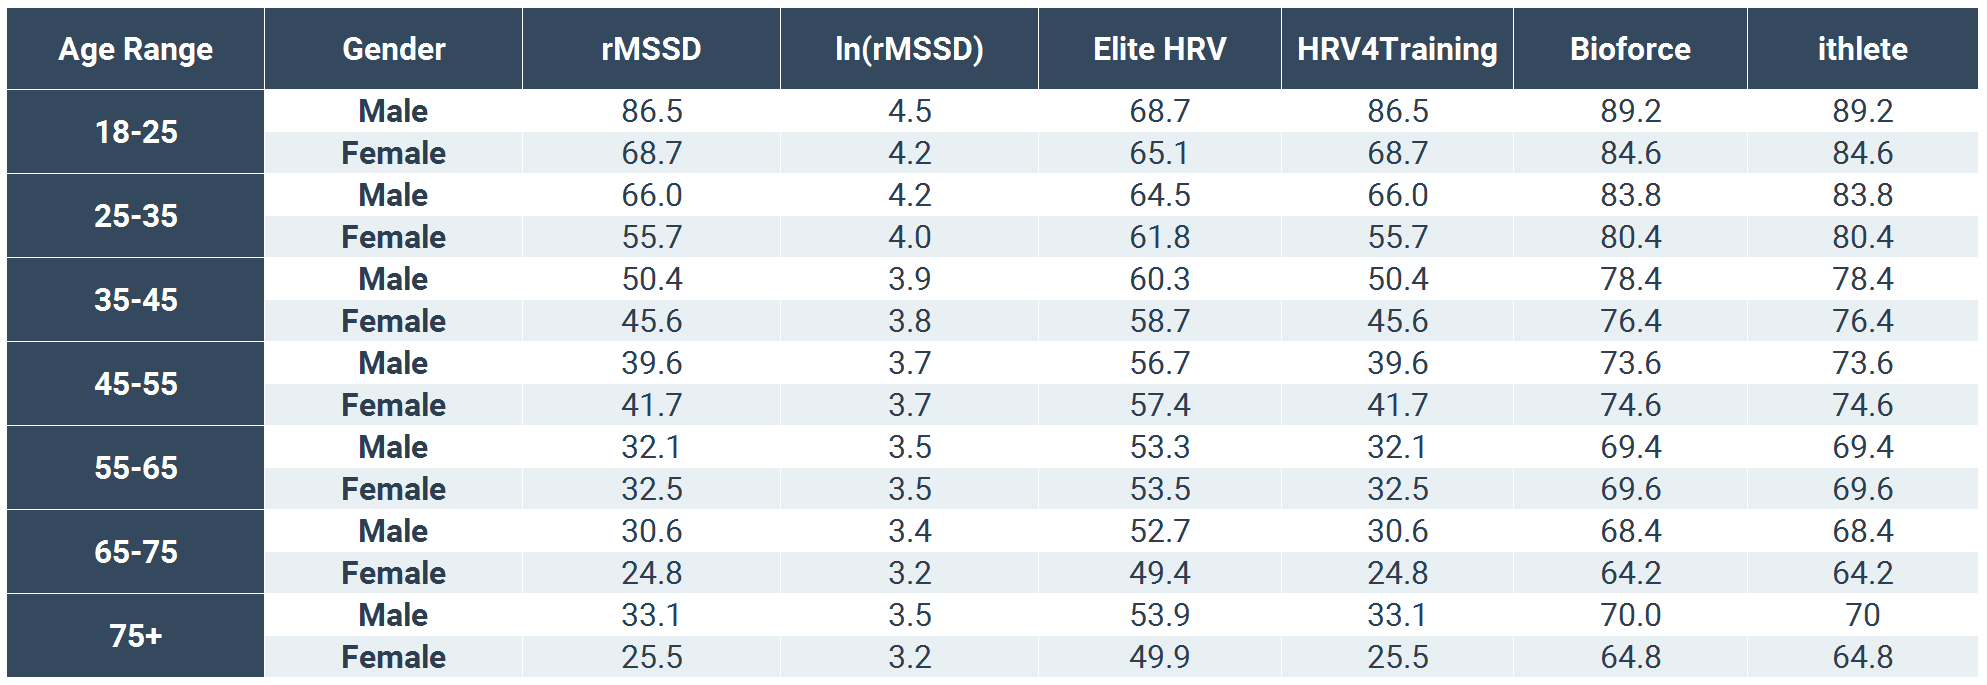

In [27]:
from IPython.display import Image
Image('/home/steven/Downloads/HRVPlatformsComparison.png')

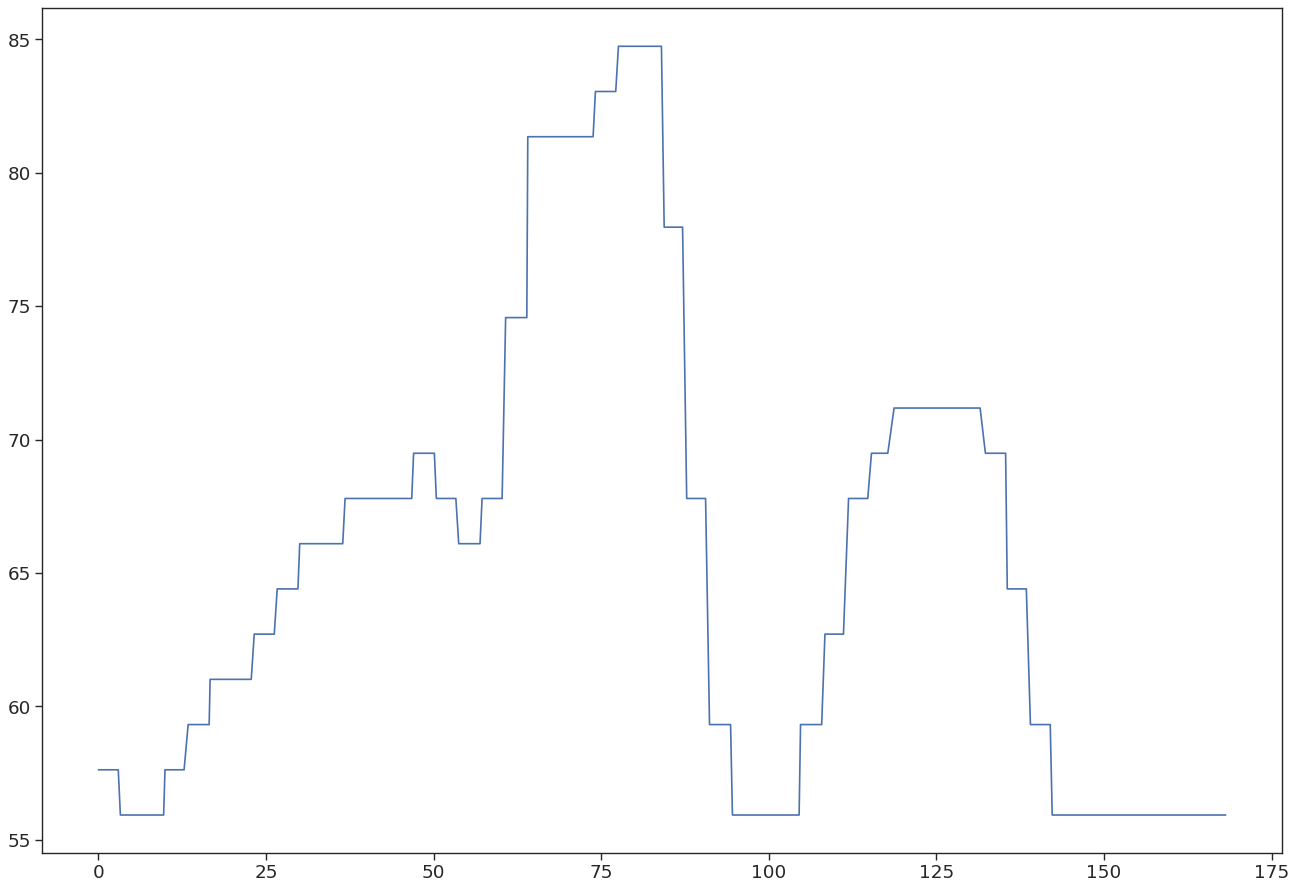

In [28]:
plt.figure(figsize=(20, 14), dpi=80)
plt.plot(hrs['seconds'],hrs['hrs'])
# plt.xlim(3000,10000)

## Analyzing Shimmer Data

In [29]:
csv = pd.read_csv('/home/steven/Downloads/rPPG_Session1_Shimmer_6114_Calibrated_PC - rPPG_Session1_Shimmer_6114_Calibrated_PC (5).csv')

In [30]:
csv = csv.drop([0])

In [31]:
csv.columns

Index(['Shimmer_6114_TimestampSync_Unix_CAL', 'Shimmer_6114_GSR_Range_CAL',
       'Shimmer_6114_GSR_Skin_Conductance_CAL',
       'Shimmer_6114_GSR_Skin_Resistance_CAL', 'Shimmer_6114_PPG_A13_CAL'],
      dtype='object')

In [32]:
csv = csv[['Shimmer_6114_TimestampSync_Unix_CAL', 'Shimmer_6114_PPG_A13_CAL']]

In [33]:
type(csv['Shimmer_6114_TimestampSync_Unix_CAL'][1])

str

In [34]:
csv['Shimmer_6114_TimestampSync_Unix_CAL'] = csv['Shimmer_6114_TimestampSync_Unix_CAL'].str.replace(',', '')
csv['Shimmer_6114_TimestampSync_Unix_CAL'] = csv['Shimmer_6114_TimestampSync_Unix_CAL'].astype(float)
csv['Shimmer_6114_PPG_A13_CAL'] = csv['Shimmer_6114_PPG_A13_CAL'].astype(float)
csv['Shimmer_6114_TimestampSync_Unix_CAL'] = csv['Shimmer_6114_TimestampSync_Unix_CAL']/1000
# csv['diff'] = csv['Shimmer_6114_TimestampSync_Unix_CAL'].diff()

In [35]:
csv = csv.rename(columns = {'Shimmer_6114_TimestampSync_Unix_CAL':'time'})

In [36]:
# csv['time'] = csv['time'].round(2)

In [37]:
# data['time'] = data['time'].round(2)

In [38]:
csv_2 = csv[(csv['time']>=1588100913.33000) & (csv['time']<=1588101087.49000)]

In [39]:
csv_2['seconds'] = csv_2['time'] - csv_2['time'].iloc[0]

/home/steven/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
csv_2

time  Shimmer_6114_PPG_A13_CAL   seconds
1627 1588100913.36815                1415.38462   0.00000
1628 1588100913.46816                1407.32601   0.10001
1629 1588100913.56816                1411.72161   0.20001
1630 1588100913.66817                1410.25641   0.30002
1631 1588100913.76814                1410.98901   0.39999
1632 1588100913.86815                1438.82784   0.50000
1633 1588100913.96815                1435.89744   0.60000
1634 1588100914.06816                1413.91941   0.70001
1635 1588100914.16816                1421.24542   0.80001
1636 1588100914.26817                1413.91941   0.90002
1637 1588100914.36817                1410.98901   1.00002
1638 1588100914.46818                1409.52381   1.10003
1639 1588100914.56815                1408.05861   1.20000
1640 1588100914.66816                1416.11722   1.30001
1641 1588100914.76816                1446.88645   1.40001
1642 1588100914.86817                1411.72161   1.50002
1643 1588100914.96818                1415.38462   1.60003
1644 1588100915.06818                1413.91941   1.70003
1645 1588100915.16819                1405.12821   1.80004
1646 1588100915.26819                1408.79121   1.90004
1647 1588100915.36820                1407.32601   2.00005
1648 1588100915.46817                1407.32601   2.10002
1649 1588100915.56818                1446.88645   2.20003
1650 1588100915.66818                1420.51282   2.30003
1651 1588100915.76819                1409.52381   2.40004
1652 1588100915.86819                1417.58242   2.50004
1653 1588100915.96820                1405.86081   2.60005
1654 1588100916.06820                1403.66300   2.70005
1655 1588100916.16821                1404.39560   2.80006
1656 1588100916.26821                1406.59341   2.90006
1657 1588100916.36819                1408.79121   3.00004
1658 1588100916.46819                1443.95604   3.10004
1659 1588100916.56820                1412.45421   3.20005
1660 1588100916.66820                1412.45421   3.30005
1661 1588100916.76821                1412.45421   3.40006
1662 1588100916.86822                1401.46520   3.50007
1663 1588100916.96822                1406.59341   3.60007
1664 1588100917.06823                1403.66300   3.70008
1665 1588100917.16823                1399.26740   3.80008
1666 1588100917.26821                1430.76923   3.90006
1667 1588100917.36821                1418.31502   4.00006
1668 1588100917.46822                1405.12821   4.10007
1669 1588100917.56822                1418.31502   4.20007
1670 1588100917.66823                1405.86081   4.30008
1671 1588100917.76823                1403.66300   4.40008
1672 1588100917.86824                1403.66300   4.50009
1673 1588100917.96824                1405.12821   4.60009
1674 1588100918.06825                1409.52381   4.70010
1675 1588100918.16822                1444.68864   4.80007
1676 1588100918.26823                1408.79121   4.90008
1677 1588100918.36823                1413.18681   5.00008
1678 1588100918.46824                1413.91941   5.10009
1679 1588100918.56825                1404.39560   5.20010
1680 1588100918.66825                1403.66300   5.30010
1681 1588100918.76826                1405.86081   5.40011
1682 1588100918.86826                1405.86081   5.50011
1683 1588100918.96827                1430.03663   5.60012
1684 1588100919.06824                1428.57143   5.70009
1685 1588100919.16825                1405.86081   5.80010
1686 1588100919.26825                1418.31502   5.90010
1687 1588100919.36826                1410.98901   6.00011
1688 1588100919.46826                1408.79121   6.10011
1689 1588100919.56827                1408.79121   6.20012
1690 1588100919.66827                1409.52381   6.30012
1691 1588100919.76828                1413.91941   6.40013
1692 1588100919.86828                1440.29304   6.50013
1693 1588100919.96826                1411.72161   6.60011
1694 1588100920.06826                1417.58242   6.70011
1695 1588100920

In [41]:
data

BVP             time   seconds  peak_heights    diff  norm_diff
0     0.20464 1588100916.33381   0.00000           nan     nan        nan
1     0.02574 1588100916.41578   0.08197           nan     nan        nan
2    -0.15165 1588100916.49328   0.15947           nan     nan        nan
3    -0.45686 1588100916.57948   0.24567           nan     nan        nan
4    -0.86841 1588100916.65744   0.32363           nan     nan        nan
5    -1.00000 1588100916.76250   0.42869           nan     nan        nan
6    -0.56211 1588100916.88276   0.54895           nan     nan        nan
7    -0.03251 1588100916.99303   0.65922           nan     nan        nan
8     0.20857 1588100917.07754   0.74372           nan     nan        nan
9     0.40133 1588100917.16558   0.83177           nan     nan        nan
10    0.51895 1588100917.27632   0.94250           nan     nan        nan
11    0.55097 1588100917.38965   1.05584           nan     nan        nan
12    0.67305 1588100917.49580   1.16198           nan     nan        nan
13    0.78583 1588100917.57719   1.24338           nan     nan        nan
14    0.90479 1588100917.65337   1.31956           nan     nan        nan
15    1.00000 1588100917.73123   1.39742       1.00000     nan        nan
16    0.96290 1588100917.80451   1.47069           nan     nan        nan
17    0.87108 1588100917.89952   1.56571           nan     nan        nan
18    0.62126 1588100918.01328   1.67947           nan     nan        nan
19    0.33560 1588100918.13912   1.80531           nan     nan        nan
20    0.29950 1588100918.25431   1.92050           nan     nan        nan
21    0.38771 1588100918.36785   2.03404           nan     nan        nan
22    0.61390 1588100918.48350   2.14969           nan     nan        nan
23    0.90340 1588100918.59671   2.26290           nan     nan        nan
24    0.93448 1588100918.71011   2.37629       0.93448 0.97888    0.29383
25    0.88910 1588100918.82511   2.49130           nan     nan        nan
26    0.87158 1588100918.94390   2.61009           nan     nan        nan
27    0.75558 1588100919.05416   2.72035           nan     nan        nan
28    0.67041 1588100919.17621   2.84239           nan     nan        nan
29    0.54501 1588100919.29389   2.96008           nan     nan        nan
30   -0.97849 1588100919.60954   3.27573           nan     nan        nan
31   -0.34302 1588100919.71846   3.38465           nan     nan        nan
32   -0.27897 1588100919.83092   3.49711           nan     nan        nan
33   -0.27880 1588100919.95449   3.62068      -0.27880 1.24438    0.38820
34   -0.52639 1588100920.05251   3.71870           nan     nan        nan
35   -0.67892 1588100920.14296   3.80915           nan     nan        nan
36   -0.85689 1588100920.22641   3.89260           nan     nan        nan
37   -1.00000 1588100920.30908   3.97527           nan     nan        nan
38   -0.39522 1588100920.38874   4.05493           nan     nan        nan
39    0.12705 1588100920.46331   4.12950           nan     nan        nan
40    0.32093 1588100920.56986   4.23605           nan     nan        nan
41    0.41055 1588100920.68312   4.34930       0.41055 0.72863    0.20489
42    0.23313 1588100920.79142   4.45761           nan     nan        nan
43    0.14665 1588100920.88239   4.54858           nan     nan        nan
44    0.08061 1588100920.96611   4.63230           nan     nan        nan
45    0.28797 1588100921.04608   4.71226           nan     nan        nan
46    0.74409 1588100921.13315   4.79934           nan     nan        nan
47    0.91228 1588100921.21915   4.88533           nan     nan        nan
48    1.00000 1588100921.33860   5.00479       1.00000 0.65548    0.17889
49    0.92432 1588100921.44540   5.11159           nan     nan        nan
50    0.71599 1588100921.55448   5.22067           nan     nan        nan
51    0.62002 1588100921.67301   5.33920           nan     nan        nan
52    0.58663 1588100921.78530   5.45149           nan     nan        nan
53    0.70710 

In [42]:
data['time'].iloc[-1] - data['time'].iloc[0]

168.1518542766571

In [43]:
csv_2['time'].iloc[-1] - csv_2['time'].iloc[0]

168.10324001312256

In [44]:
csv_2['normalized'] = (2*(csv_2['Shimmer_6114_PPG_A13_CAL'] - csv_2['Shimmer_6114_PPG_A13_CAL'].min())/(csv_2['Shimmer_6114_PPG_A13_CAL'].max() - csv_2['Shimmer_6114_PPG_A13_CAL'].min()))-1

/home/steven/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_1 = csv_2
df_2 = pd.DataFrame()
frames_per_rotation = 10
num_rotations = 331
for i in range(0, num_rotations*frames_per_rotation, frames_per_rotation):
    cur_df = df_1[i:i+frames_per_rotation]
    cur_df['normalized'] = (2*(cur_df['Shimmer_6114_PPG_A13_CAL'] - cur_df['Shimmer_6114_PPG_A13_CAL'].min())/
                            (cur_df['Shimmer_6114_PPG_A13_CAL'].max() - cur_df['Shimmer_6114_PPG_A13_CAL'].min()))-1
    df_2 = df_2.append(cur_df)

/home/steven/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
df_2

time  Shimmer_6114_PPG_A13_CAL   seconds  normalized
1627 1588100913.36815                1415.38462   0.00000    -0.48837
1628 1588100913.46816                1407.32601   0.10001    -1.00000
1629 1588100913.56816                1411.72161   0.20001    -0.72093
1630 1588100913.66817                1410.25641   0.30002    -0.81395
1631 1588100913.76814                1410.98901   0.39999    -0.76744
1632 1588100913.86815                1438.82784   0.50000     1.00000
1633 1588100913.96815                1435.89744   0.60000     0.81395
1634 1588100914.06816                1413.91941   0.70001    -0.58140
1635 1588100914.16816                1421.24542   0.80001    -0.11628
1636 1588100914.26817                1413.91941   0.90002    -0.58140
1637 1588100914.36817                1410.98901   1.00002    -0.71930
1638 1588100914.46818                1409.52381   1.10003    -0.78947
1639 1588100914.56815                1408.05861   1.20000    -0.85965
1640 1588100914.66816                1416.11722   1.30001    -0.47368
1641 1588100914.76816                1446.88645   1.40001     1.00000
1642 1588100914.86817                1411.72161   1.50002    -0.68421
1643 1588100914.96818                1415.38462   1.60003    -0.50877
1644 1588100915.06818                1413.91941   1.70003    -0.57895
1645 1588100915.16819                1405.12821   1.80004    -1.00000
1646 1588100915.26819                1408.79121   1.90004    -0.82456
1647 1588100915.36820                1407.32601   2.00005    -0.83051
1648 1588100915.46817                1407.32601   2.10002    -0.83051
1649 1588100915.56818                1446.88645   2.20003     1.00000
1650 1588100915.66818                1420.51282   2.30003    -0.22034
1651 1588100915.76819                1409.52381   2.40004    -0.72881
1652 1588100915.86819                1417.58242   2.50004    -0.35593
1653 1588100915.96820                1405.86081   2.60005    -0.89830
1654 1588100916.06820                1403.66300   2.70005    -1.00000
1655 1588100916.16821                1404.39560   2.80006    -0.96610
1656 1588100916.26821                1406.59341   2.90006    -0.86441
1657 1588100916.36819                1408.79121   3.00004    -0.57377
1658 1588100916.46819                1443.95604   3.10004     1.00000
1659 1588100916.56820                1412.45421   3.20005    -0.40984
1660 1588100916.66820                1412.45421   3.30005    -0.40984
1661 1588100916.76821                1412.45421   3.40006    -0.40984
1662 1588100916.86822                1401.46520   3.50007    -0.90164
1663 1588100916.96822                1406.59341   3.60007    -0.67213
1664 1588100917.06823                1403.66300   3.70008    -0.80328
1665 1588100917.16823                1399.26740   3.80008    -1.00000
1666 1588100917.26821                1430.76923   3.90006     0.40984
1667 1588100917.36821                1418.31502   4.00006    -0.28571
1668 1588100917.46822                1405.12821   4.10007    -0.92857
1669 1588100917.56822                1418.31502   4.20007    -0.28571
1670 1588100917.66823                1405.86081   4.30008    -0.89286
1671 1588100917.76823                1403.66300   4.40008    -1.00000
1672 1588100917.86824                1403.66300   4.50009    -1.00000
1673 1588100917.96824                1405.12821   4.60009    -0.92857
1674 1588100918.06825                1409.52381   4.70010    -0.71429
1675 1588100918.16822                1444.68864   4.80007     1.00000
1676 1588100918.26823                1408.79121   4.90008    -0.75000
1677 1588100918.36823                1413.18681   5.00008    -0.27778
1678 1588100918.46824                1413.91941   5.10009    -0.22222
1679 1588100918.56825                1404.39560   5.20010    -0.94444
1680 1588100918.66825                1403.66300   5.30010    -1.00000
1681 1588100918.76826                1405.86081   5.40011    -0.83333
1682 1588100918.86826                1405.86081   5.50011    -0.83333
1683 1588100918.96827      

In [47]:
df_2['normalized_rolling'] = df_2['normalized'].rolling(1).median()

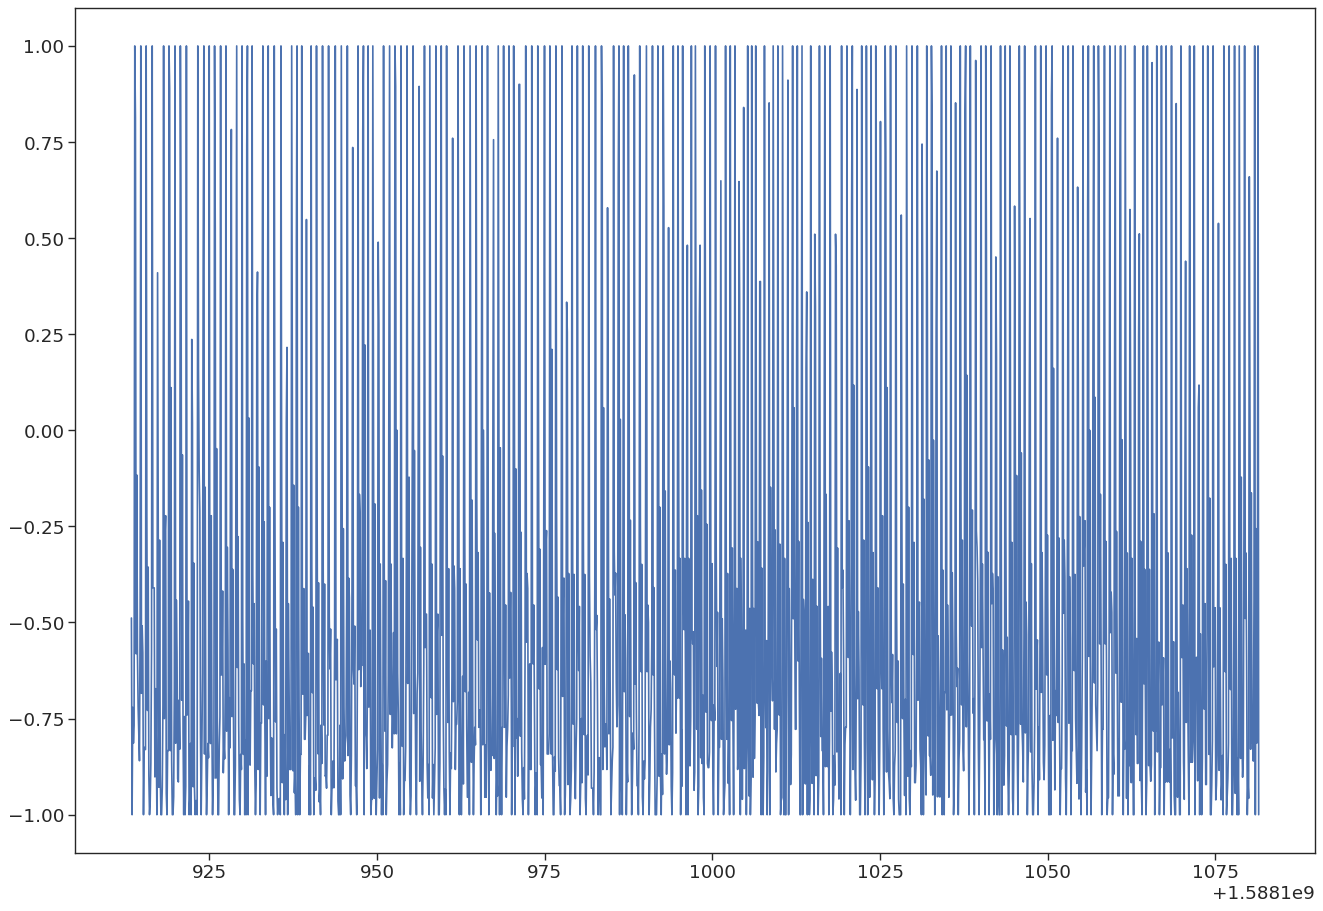

In [48]:
plt.figure(figsize=(20, 14), dpi=80)
plt.plot((df_2['time']), df_2['normalized_rolling'], label='Shimmer')

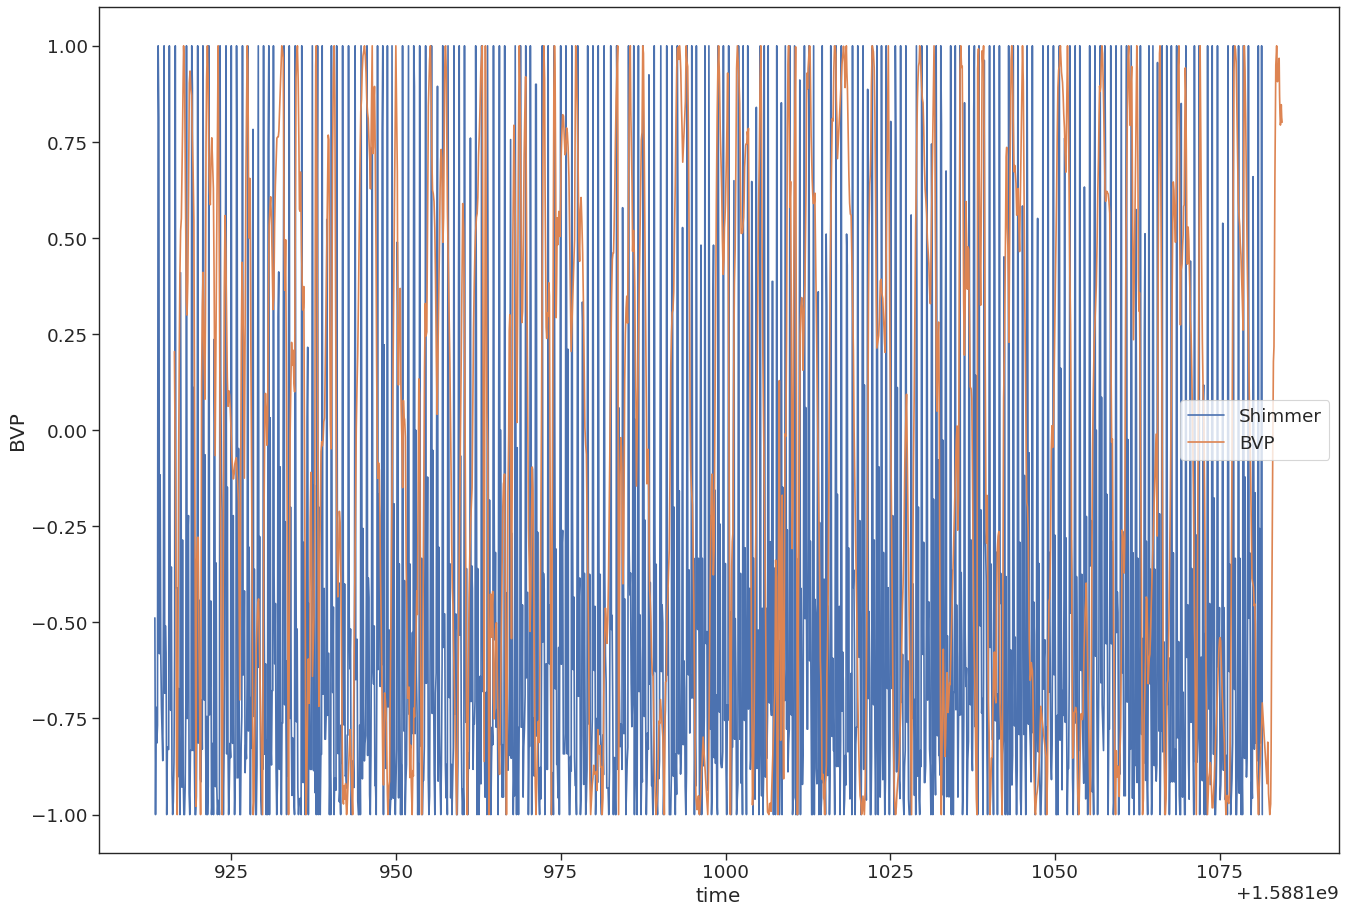

In [49]:
# Need to shift Shimmer data to line up with rPPG data
plt.figure(figsize=(20, 14), dpi=80)
plt.plot((df_2['time']), df_2['normalized'], label='Shimmer')
sns.lineplot(data['time'], data['BVP'], label='BVP')
# plt.ylim(1350,1500)
# plt.xlim(12+1.5881009e9, 46+1.5881009e9)

In [50]:
data['diff_4'] = data['BVP'].diff()

In [51]:
df_2['diff_4'] = df_2['normalized'].diff()

In [52]:
print(data['diff_4'].max())
print(data['diff_4'].min())
print(data['diff_4'].mean())
print(data['diff_4'].median())
print(data['diff_4'].std())

2.0
-2.0
0.0003979490274274813
0.0003007336665601379
0.25502742549791835


In [53]:
print(df_2['diff_4'].max())
print(df_2['diff_4'].min())
print(df_2['diff_4'].mean())
print(df_2['diff_4'].median())
print(df_2['diff_4'].std())

2.0
-2.0
-0.00030435934242958575
0.0
0.8590096294966155


In [54]:
# df_2.loc[df_2['diff_4'] <= df_2['diff_4'].std(), 'not_dropped'] = df_2['normalized']
df_2.loc[(df_2['diff_4'] <= 0.45) & (df_2['diff_4'] >= -0.45), 'not_dropped'] = df_2['normalized']
df_2.loc[(df_2['diff_4'] > 0.45) | (df_2['diff_4'] < -0.45), 'not_dropped'] = np.nan

In [55]:
df_2

time  Shimmer_6114_PPG_A13_CAL   seconds  normalized  \
1627 1588100913.36815                1415.38462   0.00000    -0.48837   
1628 1588100913.46816                1407.32601   0.10001    -1.00000   
1629 1588100913.56816                1411.72161   0.20001    -0.72093   
1630 1588100913.66817                1410.25641   0.30002    -0.81395   
1631 1588100913.76814                1410.98901   0.39999    -0.76744   
1632 1588100913.86815                1438.82784   0.50000     1.00000   
1633 1588100913.96815                1435.89744   0.60000     0.81395   
1634 1588100914.06816                1413.91941   0.70001    -0.58140   
1635 1588100914.16816                1421.24542   0.80001    -0.11628   
1636 1588100914.26817                1413.91941   0.90002    -0.58140   
1637 1588100914.36817                1410.98901   1.00002    -0.71930   
1638 1588100914.46818                1409.52381   1.10003    -0.78947   
1639 1588100914.56815                1408.05861   1.20000    -0.85965   
1640 1588100914.66816                1416.11722   1.30001    -0.47368   
1641 1588100914.76816                1446.88645   1.40001     1.00000   
1642 1588100914.86817                1411.72161   1.50002    -0.68421   
1643 1588100914.96818                1415.38462   1.60003    -0.50877   
1644 1588100915.06818                1413.91941   1.70003    -0.57895   
1645 1588100915.16819                1405.12821   1.80004    -1.00000   
1646 1588100915.26819                1408.79121   1.90004    -0.82456   
1647 1588100915.36820                1407.32601   2.00005    -0.83051   
1648 1588100915.46817                1407.32601   2.10002    -0.83051   
1649 1588100915.56818                1446.88645   2.20003     1.00000   
1650 1588100915.66818                1420.51282   2.30003    -0.22034   
1651 1588100915.76819                1409.52381   2.40004    -0.72881   
1652 1588100915.86819                1417.58242   2.50004    -0.35593   
1653 1588100915.96820                1405.86081   2.60005    -0.89830   
1654 1588100916.06820                1403.66300   2.70005    -1.00000   
1655 1588100916.16821                1404.39560   2.80006    -0.96610   
1656 1588100916.26821                1406.59341   2.90006    -0.86441   
1657 1588100916.36819                1408.79121   3.00004    -0.57377   
1658 1588100916.46819                1443.95604   3.10004     1.00000   
1659 1588100916.56820                1412.45421   3.20005    -0.40984   
1660 1588100916.66820                1412.45421   3.30005    -0.40984   
1661 1588100916.76821                1412.45421   3.40006    -0.40984   
1662 1588100916.86822                1401.46520   3.50007    -0.90164   
1663 1588100916.96822                1406.59341   3.60007    -0.67213   
1664 1588100917.06823                1403.66300   3.70008    -0.80328   
1665 1588100917.16823                1399.26740   3.80008    -1.00000   
1666 1588100917.26821                1430.76923   3.90006     0.40984   
1667 1588100917.36821                1418.31502   4.00006    -0.28571   
1668 1588100917.46822                1405.12821   4.10007    -0.92857   
1669 1588100917.56822                1418.31502   4.20007    -0.28571   
1670 1588100917.66823                1405.86081   4.30008    -0.89286   
1671 1588100917.76823                1403.66300   4.40008    -1.00000   
1672 1588100917.86824                1403.66300   4.50009    -1.00000   
1673 1588100917.96824                1405.12821   4.60009    -0.92857   
1674 1588100918.06825                1409.52381   4.70010    -0.71429   
1675 1588100918.16822                1444.68864   4.80007     1.00000   
1676 1588100918.26823                1408.79121   4.90008    -0.75000   
1677 1588100918.36823                1413.18681   5.00008    -0.27778   
1678 1588100918.46824                1413.91941   5.10009    -0.22222   
1679 1588100918.56825                1404.39560   5.20010    -0.94444   
1680 1588100918.66825                1403.66300   5.30010    -1.00000   
16

In [56]:
df_2['not_dropped'] = df_2['not_dropped'].interpolate()

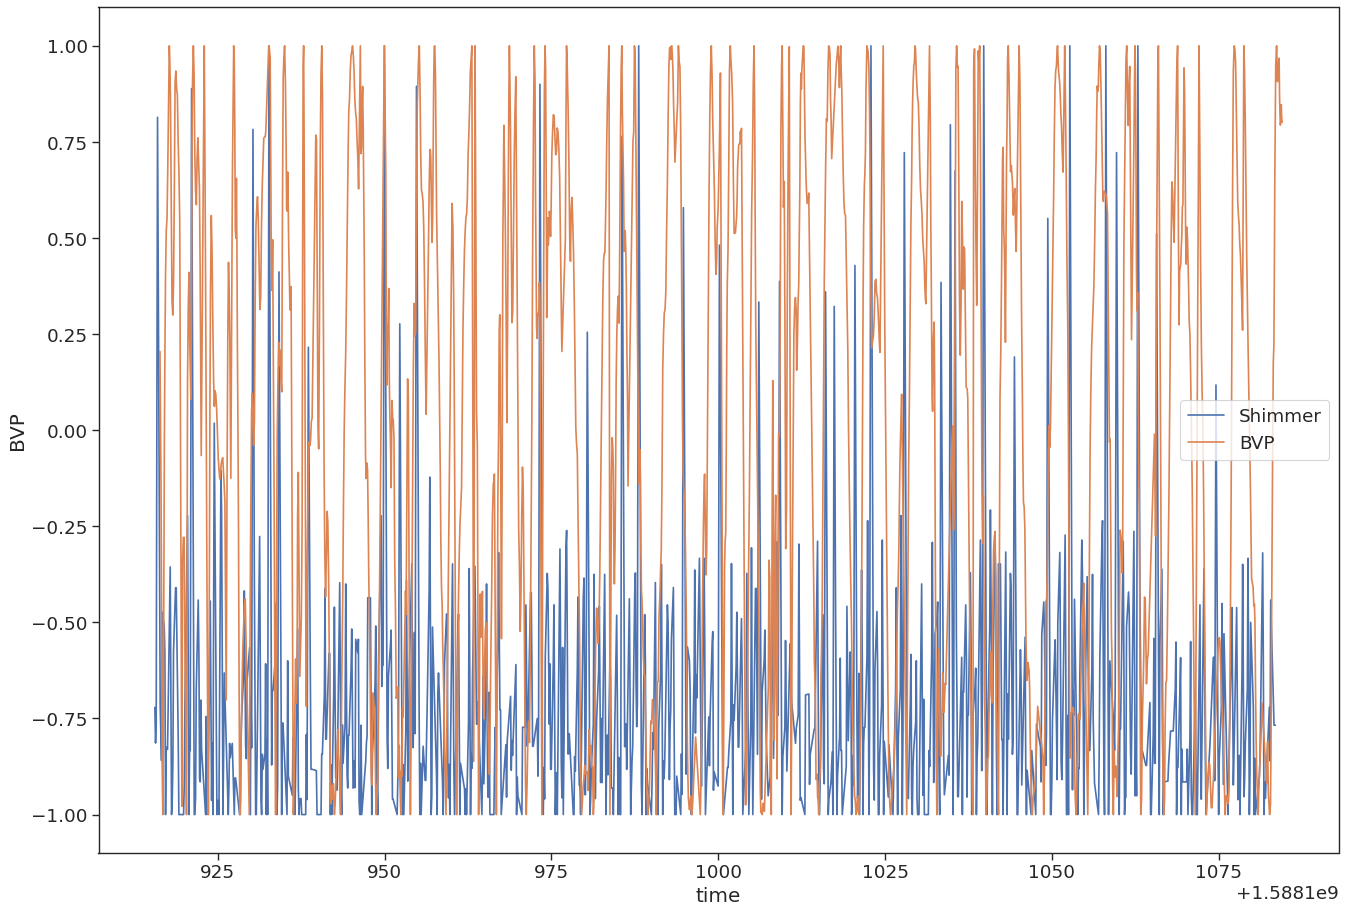

In [57]:
plt.figure(figsize=(20, 14), dpi=80)
plt.plot((df_2['time']+2), df_2['not_dropped'], label='Shimmer')
sns.lineplot((data['time']), data['BVP'], label='BVP')
# plt.xlim(950+1.5881e9, 975+1.5881e9)

## Comparing Peak Points

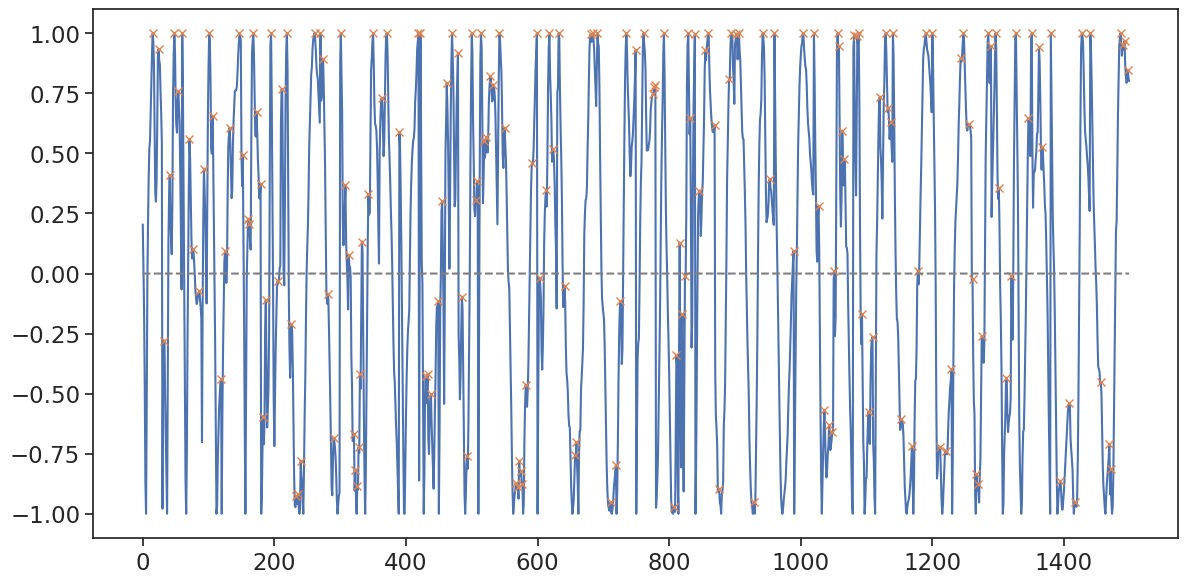

In [58]:
plt.figure(figsize=(14, 7), dpi=100)
x = data['BVP']
y = data['time']
peaks, _ = find_peaks(x, height=-1)
# , distance=10)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
sns.set(font_scale =1.5, style = 'ticks' )
plt.show()
# plt.xlim(0,3000)

In [59]:
y = pd.DataFrame(_, columns=['peak_heights'])
peaks = pd.DataFrame(peaks, columns=['peak_points'])
peaks = peaks.merge(y, on=peaks.index)
peaks_rppg = peaks.drop(['key_0'], axis=1)

In [60]:
peaks_rppg.set_index(['peak_points'])
rppg_time = data['time'][list(peaks_rppg.peak_points)]
rppg_time = pd.DataFrame(rppg_time)
peaks_rppg = peaks_rppg.merge(rppg_time, on=rppg_time.index)

In [61]:
peaks_rppg

key_0  peak_points  peak_heights             time
0       15           15       1.00000 1588100917.73123
1       24           24       0.93448 1588100918.71011
2       33           33      -0.27880 1588100919.95449
3       41           41       0.41055 1588100920.68312
4       48           48       1.00000 1588100921.33860
5       54           54       0.76064 1588100922.00842
6       60           60       1.00000 1588100922.96933
7       71           71       0.55847 1588100924.02000
8       76           76       0.10258 1588100924.59152
9       86           86      -0.07176 1588100925.73467
10      93           93       0.43681 1588100926.60188
11     101          101       1.00000 1588100927.38020
12     106          106       0.65516 1588100927.78721
13     119          119      -0.43893 1588100929.11411
14     125          125       0.09561 1588100930.15941
15     132          132       0.60725 1588100930.94751
16     147          147       1.00000 1588100932.62930
17     152          152       0.49539 1588100933.21816
18     160          160       0.22846 1588100934.12240
19     162          162       0.20823 1588100934.35451
20     168          168       1.00000 1588100935.00780
21     173          173       0.67162 1588100935.47288
22     179          179       0.37366 1588100935.97961
23     183          183      -0.59515 1588100936.65936
24     187          187      -0.10980 1588100937.06215
25     195          195       1.00000 1588100937.86366
26     205          205      -0.02998 1588100938.69297
27     211          211       0.76782 1588100939.68237
28     219          219       1.00000 1588100940.58072
29     226          226      -0.21105 1588100941.37573
30     233          233      -0.92501 1588100942.07205
31     236          236      -0.91949 1588100942.31710
32     240          240      -0.77906 1588100943.00393
33     261          261       1.00000 1588100945.18961
34     270          270       1.00000 1588100946.36109
35     274          274       0.89443 1588100946.70747
36     281          281      -0.08513 1588100947.32714
37     290          290      -0.68351 1588100948.24295
38     301          301       1.00000 1588100949.94868
39     308          308       0.36884 1588100950.60982
40     313          313       0.07752 1588100951.09472
41     321          321      -0.66831 1588100951.95071
42     323          323      -0.81956 1588100952.19247
43     326          326      -0.88574 1588100952.52765
44     328          328      -0.72293 1588100952.68335
45     330          330      -0.41809 1588100953.12800
46     333          333       0.13342 1588100953.44009
47     343          343       0.32962 1588100954.41723
48     350          350       1.00000 1588100955.19628
49     363          363       0.73048 1588100956.83625
50     371          371       1.00000 1588100957.50970
51     390          390       0.58966 1588100960.10371
52     419          419       1.00000 1588100963.06946
53     422          422       1.00000 1588100963.54221
54     430          430      -0.42616 1588100964.32889
55     433          433      -0.41923 1588100964.65296
56     438          438      -0.50111 1588100965.21875
57     449          449      -0.11399 1588100966.44682
58     455          455       0.30029 1588100967.25007
59     462          462       0.79329 1588100967.86079
60     470          470       1.00000 1588100968.69098
61     479          479       0.91951 1588100969.65201
62     485          485      -0.09578 1588100970.65296
63     493          493      -0.75740 1588100971.57444
64     500          500       1.00000 1588100972.42147
65     506          506       0.30438 1588100972.96002
66     508          508       0.38346 1588100973.17848
67     514          514       1.00000 1588100974.03299
68     519          519       0.55237 1588100974.45073
69     522          522       0.56930 1588100974.68678
70     528          528       0.82080 1588100975.27580
71     533          533       0.78649 1588100

In [62]:
df_3 = df_2.reset_index(drop=True)
df_3['seconds'] = df_3['time'] - df_3['time'][0]

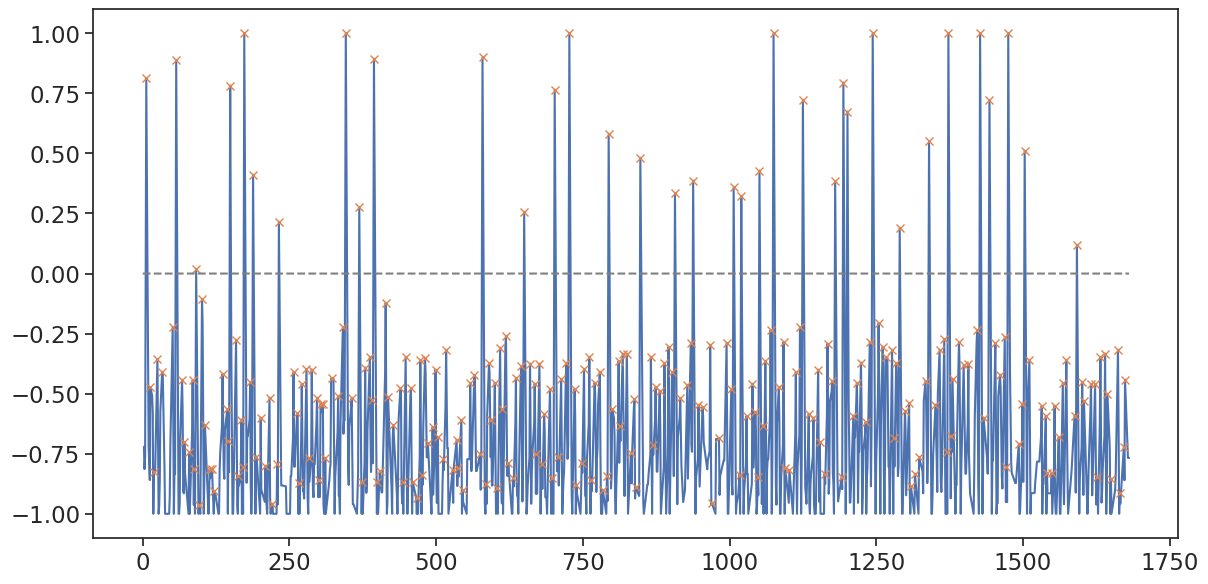

In [63]:
plt.figure(figsize=(14, 7), dpi=100)
x = df_3['not_dropped']
peaks, _ = find_peaks(x, height=-1)
# , distance=10)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
sns.set(font_scale =1.5, style = 'ticks' )
plt.show()
# plt.xlim(0,3000)

In [64]:
y = pd.DataFrame(_, columns=['peak_heights'])
peaks = pd.DataFrame(peaks, columns=['peak_points'])
peaks = peaks.merge(y, on=peaks.index)
peaks_shimmer = peaks.drop(['key_0'], axis=1)

In [65]:
peaked = peaks_shimmer.set_index('peak_points')
df_3 = pd.concat([df_3, peaked], axis=1)
df_4 = df_3.dropna()
df_4['diff'] = df_4['seconds'].diff()
df_4['norm_diff'] = (df_4['diff'] - df_4['diff'].min())/(df_4['diff'].max() - df_4['diff'].min())
df_5=df_4[['diff', 'norm_diff']]
df_5 = pd.DataFrame(df_5)
df_3 = pd.concat([df_3, df_5], axis=1)

/home/steven/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/steven/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [66]:
peaks_shimmer.set_index(['peak_points'])
shimmer_time = df_3['time'][list(peaks_shimmer.peak_points)]
shimmer_time = pd.DataFrame(shimmer_time)
peaks_shimmer = peaks_shimmer.merge(shimmer_time, on=shimmer_time.index)

In [67]:
peaks_shimmer

key_0  peak_points  peak_heights             time
0        6            6       0.81395 1588100913.96815
1       13           13      -0.47368 1588100914.66816
2       19           19      -0.82456 1588100915.26819
3       25           25      -0.35593 1588100915.86819
4       33           33      -0.40984 1588100916.66820
5       51           51      -0.22222 1588100918.46824
6       57           57       0.88889 1588100919.06824
7       67           67      -0.44186 1588100920.06826
8       71           71      -0.70213 1588100920.46829
9       79           79      -0.74468 1588100921.26830
10      85           85      -0.44444 1588100921.86830
11      88           88      -0.81481 1588100922.16832
12      91           91       0.01818 1588100922.46833
13      96           96      -0.96364 1588100922.96833
14     101          101      -0.10526 1588100923.46832
15     106          106      -0.63158 1588100923.96835
16     114          114      -0.81481 1588100924.76836
17     118          118      -0.81481 1588100925.16838
18     122          122      -0.90476 1588100925.56837
19     136          136      -0.41818 1588100926.96842
20     144          144      -0.56522 1588100927.76843
21     146          146      -0.69565 1588100927.96841
22     149          149       0.78261 1588100928.26843
23     159          159      -0.27660 1588100929.26845
24     163          163      -0.84314 1588100929.66847
25     168          168      -0.60784 1588100930.16847
26     170          170      -0.80645 1588100930.36848
27     173          173       1.00000 1588100930.66846
28     183          183      -0.45098 1588100931.66849
29     188          188       0.41176 1588100932.16851
30     193          193      -0.76190 1588100932.66851
31     201          201      -0.60000 1588100933.46852
32     209          209      -0.80000 1588100934.26853
33     216          216      -0.51724 1588100934.96857
34     220          220      -0.95833 1588100935.36856
35     229          229      -0.79167 1588100936.26858
36     232          232       0.21569 1588100936.56860
37     257          257      -0.41176 1588100939.06864
38     263          263      -0.58065 1588100939.66864
39     266          266      -0.87097 1588100939.96866
40     271          271      -0.46032 1588100940.46865
41     279          279      -0.39683 1588100941.26869
42     283          283      -0.76667 1588100941.66868
43     288          288      -0.40000 1588100942.16871
44     297          297      -0.51724 1588100943.06873
45     301          301      -0.85965 1588100943.46872
46     303          303      -0.54386 1588100943.66873
47     307          307      -0.54386 1588100944.06872
48     311          311      -0.76744 1588100944.46874
49     323          323      -0.43590 1588100945.66878
50     333          333      -0.50943 1588100946.66877
51     341          341      -0.22222 1588100947.46881
52     346          346       1.00000 1588100947.96881
53     356          356      -0.52000 1588100948.96883
54     369          369       0.27660 1588100950.26884
55     374          374      -0.86957 1588100950.76887
56     379          379      -0.39130 1588100951.26886
57     387          387      -0.34783 1588100952.06887
58     391          391      -0.52632 1588100952.46890
59     394          394       0.89474 1588100952.76891
60     400          400      -0.86667 1588100953.36891
61     404          404      -0.82222 1588100953.76893
62     414          414      -0.12195 1588100954.76893
63     418          418      -0.51220 1588100955.16895
64     427          427      -0.63158 1588100956.06897
65     439          439      -0.47826 1588100957.26900
66     443          443      -0.86956 1588100957.66899
67     448          448      -0.34783 1588100958.16902
68     457          457      -0.47826 1588100959.06903
69     460          460      -0.86667 1588100959.36902
70     468          468      -0.93333 1588100960.16903
71     473          473      -0.36000 1588100

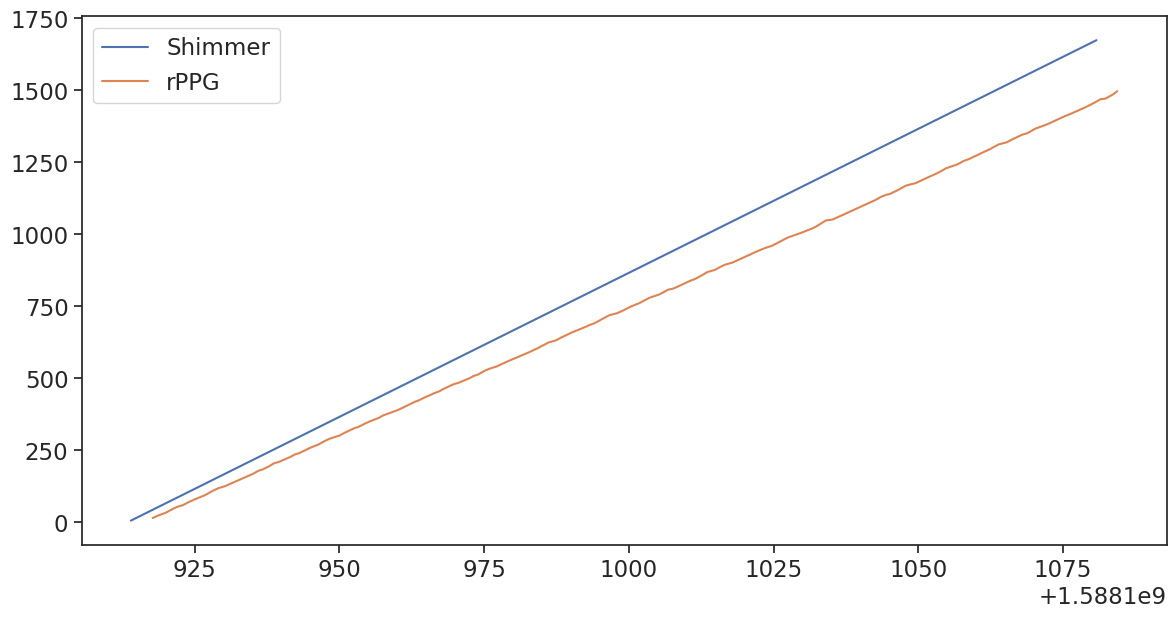

In [68]:
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(peaks_shimmer['time'], peaks_shimmer['peak_points'], label='Shimmer')
plt.plot(peaks_rppg['time'], peaks_rppg['peak_points'], label='rPPG')
plt.legend()

## Comparing Heart Rate Measurements

In [69]:
# hr = pd.read_csv('/home/steven/Downloads/rPPG_Session1_Shimmer_6114_Calibrated_PC - rPPG_Session1_Shimmer_6114_Calibrated_PC (4).csv')

In [70]:
# hr.head()

In [71]:
# hr = hr.drop([0])
# hr['Shimmer_6114_TimestampSync_Unix_CAL'] = hr['Shimmer_6114_TimestampSync_Unix_CAL'].str.replace(',', '')
# hr['Shimmer_6114_TimestampSync_Unix_CAL'] = hr['Shimmer_6114_TimestampSync_Unix_CAL'].astype(float)
# hr['Shimmer_6114_TimestampSync_Unix_CAL'] = hr['Shimmer_6114_TimestampSync_Unix_CAL']/1000
# hr['Shimmer_6114_PPGToHR_PPG_A13_CAL'] = hr['Shimmer_6114_PPGToHR_PPG_A13_CAL'].astype(float)

In [72]:
# hrs.head()

In [73]:
# plt.figure(figsize=(20, 14), dpi=80)
# plt.plot(hrs['time'],hrs['hrs'])
# plt.plot(hr['Shimmer_6114_TimestampSync_Unix_CAL'],hr['Shimmer_6114_PPGToHR_PPG_A13_CAL'])
# plt.xlim(460+1.588083e9,500+1.588083e9)

## Comparing HRV Data

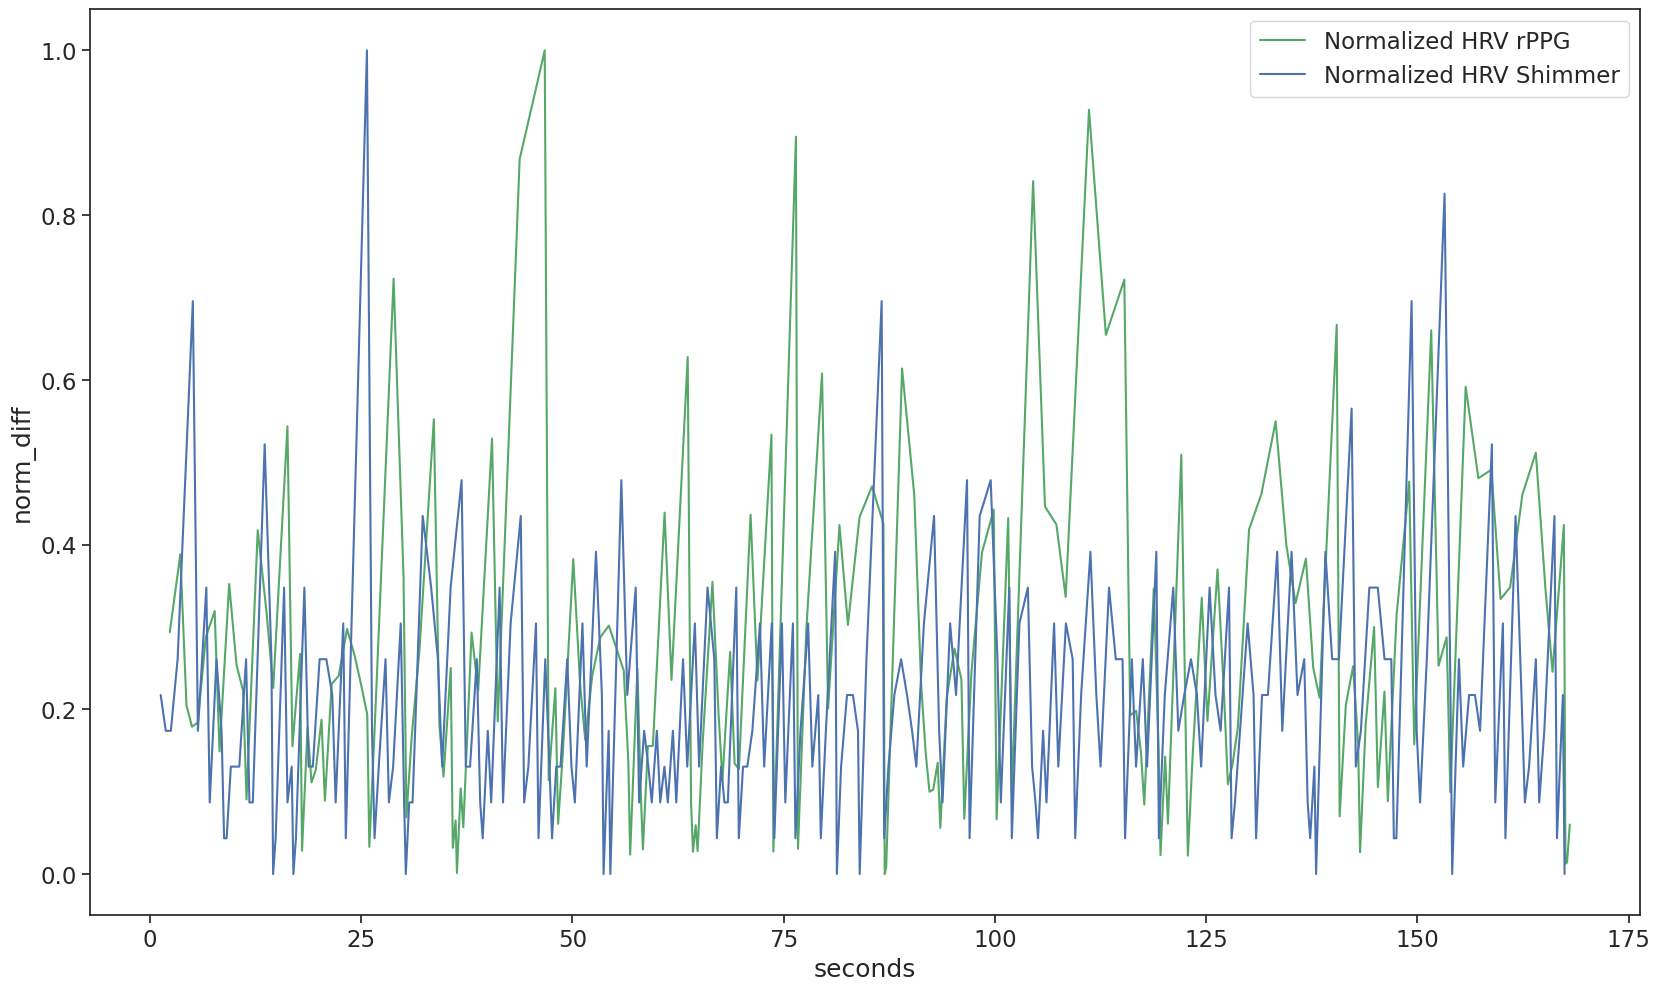

In [74]:
plt.figure(figsize=(20, 12), dpi=100)
sns.lineplot(data['seconds'], data['norm_diff'], label='Normalized HRV rPPG', color='g')
sns.lineplot(df_3['seconds'], df_3['norm_diff'], label='Normalized HRV Shimmer', color='b')
plt.legend()
sns.set(font_scale =1.5, style = 'ticks' )

In [81]:
data2 = data.dropna(subset=['diff'])
sample = data2['diff']
sample2 = data2['norm_diff']
import statistics 
print(f'HRV Variance rPPG ', statistics.variance(sample))
import statistics 
print(f'Normalized HRV Variance rPPG ', statistics.variance(sample2))
rmssd = (sum((data2['diff']*1000)**2))**.5
print(f'RMSSD rPPG ', rmssd)
nlrmssd = np.log(rmssd)
print(f'Natural Log RMSSD rPPG ', nlrmssd)

HRV Variance rPPG  0.3051290286546466
Normalized HRV Variance rPPG  0.03854410032897734
RMSSD rPPG  14360.173022256053
Natural Log RMSSD rPPG  9.572213891433252


In [82]:
data2 = df_3.dropna(subset=['diff'])
data2['diff'] = data2['diff'].astype(int)
data2['norm_diff'] = data2['norm_diff'].astype(int)
sample = data2['diff']
sample2 = data2['norm_diff']
import statistics 
print(f'HRV Variance Shimmer ', statistics.variance(sample))
import statistics 
print(f'Normalized HRV Variance Shimmer ', statistics.variance(sample2))
rmssd = (sum((data2['diff']*1000)**2))**.5
print(f'RMSSD Shimmer ', rmssd)
nlrmssd = np.log(rmssd)
print(f'Natural Log RMSSD Shimmer ', nlrmssd)

HRV Variance Shimmer  0.1569179945588807
Normalized HRV Variance Shimmer  0.004016064257028112
RMSSD Shimmer  6782.329983125268
Natural Log RMSSD Shimmer  8.822075977226685


/home/steven/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/steven/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
